In [11]:
import glob
import os
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

In [12]:
def check_match(path_folder1, path_folder2, ext1, ext2):
    """This function can be used to check whether the basenames of the files in
    both the directories are same or not
    
    Parameters
    ----------
    path_folder1 : str
        Path of the first folder
    path_folder2 : str
        Path of the first folder
    ext1 : str
        File extensions in first folder
    ext2 : str
        File extensions in second folder
    
   Prints an error message if there is no match
    """
    filenames1 = path_folder1+'*.'+ext1
    filenames2 = path_folder2+'*.'+ext2
    filenames1 = sorted(glob.glob(filenames1))
    filenames2 = sorted(glob.glob(filenames2))

    assert len(filenames1) == len(filenames2), "Different number of input and output files"

    for filename1, filename2 in zip(filenames1, filenames2):
        base1 = os.path.splitext(os.path.basename(filename1))[0]
        base2 = os.path.splitext(os.path.basename(filename2))[0]
        assert base1 == base2, f"Filename mismatch: {base1} != {base2}"

    print("✅ All filenames match!")

In [2]:
path_folder1 = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/train/input/'
path_folder2 = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/train/output/'
ext1 = 'png'
ext2 = 'npy'
check_match(path_folder1, path_folder2, ext1, ext2)

✅ All filenames match!


In [24]:
def read(filename):
    """A reading function that normalize the image between 0 and 1"""
    im = np.array(PIL.Image.open(filename))
    if im.dtype == np.uint8: im = im / (2**8-1)
    elif im.dtype == np.uint16: im = im / (2**16-1)
    elif im.dtype == np.uint32: im = im / (2**32-1)
    return im

Shape of the first image: (512, 512)
DType of the first image: float64


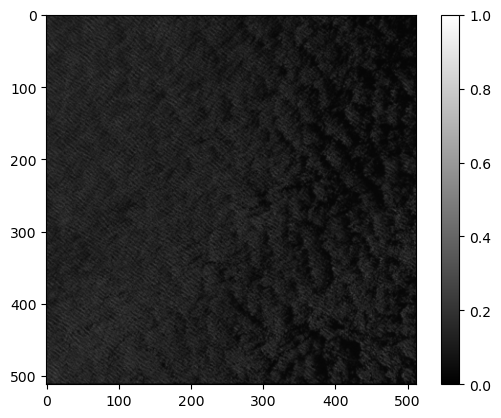

In [15]:
filename = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/train/input/s1a-wv1-slc-vv-20160312t175452-20160312t175455-010339-00f4fe-105.png'
input_array = read(filename)

print('Shape of the first image:', input_array.shape)
print('DType of the first image:', input_array.dtype)

plt.figure()
plt.imshow(input_array, vmin=0, vmax=1, cmap="gray")
plt.colorbar()
plt.show()
plt.close()

In [20]:
# Get the mean and standard deviations of the images 

# Some insights into the training dataset

filenames = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/train/input/*.png'
input_filenames = sorted(glob.glob(filenames))

n = 0
mean = 0
std = 0
for input_filename in input_filenames:
    n = n+1
    img = read(input_filename)
    img_m = img.ravel().mean()
    mean += img_m
    img_s = img.ravel().std()
    std += img_s
mean = mean/n
std = std/n
print(f'Mean of the grayscale images is {mean}')
print(f'Standard deviation of the grayscale images is {std}')

Mean of the grayscale images is 0.22888638010959997
Standard deviation of the grayscale images is 0.03957020777009094


In [ ]:
from matplotlib.colors import ColorConverter, ListedColormap, get_named_colors_mapping
import matplotlib.patches as mpatches

NAMED_COLORS = get_named_colors_mapping()
COLORS = [
    ColorConverter.to_rgb(NAMED_COLORS[color])
    for color in (
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    )
]


def fuse_canals(im, colors=COLORS):
    new_im = np.zeros((im.shape[0], im.shape[1], 3))
    for x, line in enumerate(np.argmax(im, axis=-1)):
        for y, px in enumerate(line):
            if im[x, y, px]: new_im[x, y] = colors[px]
    return new_im

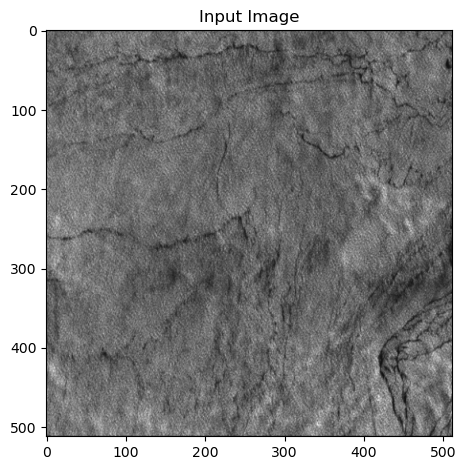

In [33]:
import PIL.Image as Image
import matplotlib.patches as mpatches
import torch

# Read an image
image_path = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/val/input/s1a-wv1-slc-vv-20161123t202114-20161123t202117-014074-016b2f-015.png'
sample_img = read(image_path)

label_path = '/Users/sushmitachandel/Desktop/dataset/ocean_features_pixel_level/archive/val/output/s1a-wv1-slc-vv-20161123t202114-20161123t202117-014074-016b2f-015.npy'
# Read the ground truth and convert suitable so that it has only 0s and 1s.
# This needs to be done only for test ground truths. Train and val alread are in
# the correct format
label_img = np.load(label_path)
if len(np.unique(label_img)) > 2:
    label_img[label_img<=125] = 0
    label_img[label_img>125] = 255

plt.imshow(sample_img, cmap='gray')
plt.title('Input Image')
plt.tight_layout()
plt.show()


Ground Truth labels class-wise


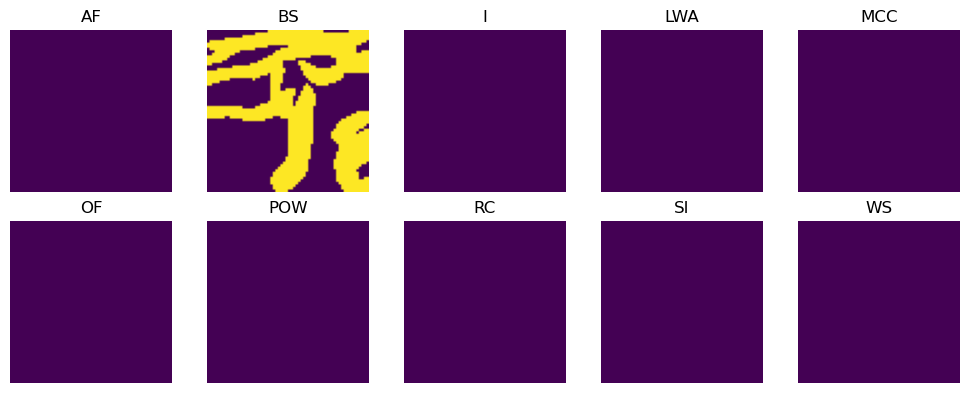

In [34]:
labels = ['AF', 'BS', 'I', 'LWA', 'MCC', 'OF', 'POW', 'RC', 'SI', 'WS']
print('Ground Truth labels class-wise')
plt.figure(figsize=(10, 4))
for i_label, label in enumerate(labels):
    plt.subplot(2, 5, i_label + 1)
    plt.imshow(label_img[:,:,i_label], vmin=0, vmax=1)
    # plt.imshow(label_img[:,:,i_label])
    # print(label_idx[:,:,i_label].shape)
    plt.axis('off')
    plt.title(label)
plt.tight_layout()
plt.show()
plt.close()

In [35]:
from matplotlib.colors import ColorConverter, ListedColormap, get_named_colors_mapping
import matplotlib.patches as mpatches

NAMED_COLORS = get_named_colors_mapping()
COLORS = [
    ColorConverter.to_rgb(NAMED_COLORS[color])
    for color in (
        'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    )
]

def fuse_canals(im, colors=COLORS):
    new_im = np.zeros((im.shape[0], im.shape[1], 3))
    for x, line in enumerate(np.argmax(im, axis=-1)):
        for y, px in enumerate(line):
            if im[x, y, px]: new_im[x, y] = colors[px]
    return new_im

Shape of the RGB output image: (64, 64, 3)
DType of the RGB output image: float64


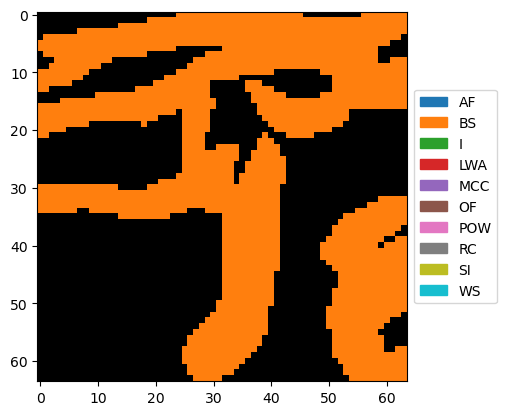

In [36]:
rgb_output_array = fuse_canals(label_img)

print('Shape of the RGB output image:', rgb_output_array.shape)
print('DType of the RGB output image:', rgb_output_array.dtype)

plt.figure()
plt.imshow(rgb_output_array)

plt.legend(
    handles=[mpatches.Patch(color=color, label=label) for color, label in zip(COLORS, labels)],
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
    
plt.show()
plt.close()